# Unsupervised Learning: Clustering Analysis

The goal of this analysis is to cluster countries based on military spending, economic indicators, and conflict metrics to uncover meaningful patterns and relationships among nations. By applying multiple clustering algorithms and tuning hyperparameters, we identified the most effective methods and parameters for achieving well-defined and interpretable clusters.

# Data Preprocessing/Cleaning

Imports

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV
from kneed import KneeLocator

In [59]:
# Load the dataset to examine its structure and contents
file_path = '../Data/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and columns
data.head()

,Country,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,Region,Subregion,index_level,total_rank_from_avg_rank,...,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score
0,Brazil,2000,NaN,0.017307,64.500907,15643.43168,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
1,Brazil,2001,0.047167,0.019519,61.332747,18119.43481,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
2,Brazil,2002,0.041112,0.018958,53.550103,18361.33076,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
3,Brazil,2003,0.035175,0.015035,45.956041,14647.82954,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851
4,Brazil,2004,0.035561,0.014613,52.945029,15219.74744,Americas,South America,1,6,...,6,6678,0.003,4117,67,0.167247,0.004342,0.635536,0.044108,0.851


In [60]:
data.describe()

,Year,Expenditure-Share_of_Govt_spending,Expenditure-Share_of_GDP,Expenditure_Per_Capita,Expenditure_Constant_2022,index_level,total_rank_from_avg_rank,avg_rank,Deadliness_rank,Diffusion_rank,...,total_score_rank,Deadliness_raw,Diffusion_raw,Danger_raw,Fragmentation_raw,Deadliness_scaled,Diffusion_scaled,Danger_scaled,Fragmentation_scaled,total_score
count,3716.000000,3533.000000,3602.000000,3604.000000,3673.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,...,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000,3716.000000
mean,2011.556512,0.071187,0.019767,243.374084,11760.889052,3.491119,86.736006,71.252758,79.672497,43.389397,...,80.705867,918.312971,0.005629,252.864101,17.972282,0.022999,0.008146,0.039034,0.011832,0.081966
std,6.889732,0.060611,0.018137,426.197550,68296.745904,0.894834,49.421439,33.403444,40.775882,13.511428,...,42.837423,3629.622878,0.023324,710.539730,107.454813,0.090902,0.033754,0.109685,0.070740,0.231303
min,2000.000000,0.000672,0.000163,0.071803,0.000000,1.000000,2.000000,4.250000,2.000000,2.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.031740,0.010229,17.077744,144.314628,3.000000,45.000000,42.750000,43.000000,37.000000,...,45.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000309,0.000000,0.001000
50%,2012.000000,0.051833,0.014996,69.809759,739.329049,4.000000,85.000000,76.500000,84.000000,51.000000,...,81.000000,7.000000,0.000000,13.000000,2.000000,0.000175,0.000000,0.002007,0.001317,0.005000
75%,2018.000000,0.091994,0.023754,270.439168,4523.330790,4.000000,131.000000,101.000000,125.000000,51.000000,...,117.000000,246.000000,0.001000,152.000000,9.000000,0.006161,0.001447,0.023464,0.005925,0.037000
max,2023.000000,0.581707,0.366531,5718.771025,990485.412100,4.000000,160.000000,114.750000,125.000000,51.000000,...,136.000000,37014.000000,0.176000,5426.000000,1519.000000,0.926995,0.254703,0.837604,1.000000,1.940000


In [61]:
# Checking the percentage of missing values in each column
missing_values = data.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

Expenditure-Share_of_Govt_spending    4.924650
Expenditure-Share_of_GDP              3.067815
Expenditure_Per_Capita                3.013994
Expenditure_Constant_2022             1.157158
dtype: float64

### Imputing missing values

- Missing values can negatively impact machine learning models and statistical analyses, leading to inaccurate results or errors.
- Imputation is a strategy to replace missing values with substitutes (like mean, median, mode, or predicted values) to make the dataset complete and usable.

In [62]:
# Impute missing values in the specified columns using the median
columns_to_impute = [
    "Expenditure-Share_of_Govt_spending", 
    "Expenditure-Share_of_GDP", 
    "Expenditure_Per_Capita", 
    "Expenditure_Constant_2022"
]

# Impute missing values in the specified columns using the median
for column in columns_to_impute:
    data[column] = data[column].fillna(data[column].median())

# Verify if there are any missing values left in these columns
remaining_missing = data[columns_to_impute].isnull().sum()
remaining_missing

Expenditure-Share_of_Govt_spending    0
Expenditure-Share_of_GDP              0
Expenditure_Per_Capita                0
Expenditure_Constant_2022             0
dtype: int64

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing data sets to uncover patterns, detect anomalies, test hypotheses, and check assumptions using statistical and graphical methods. It is an essential step in the data analysis process to understand the structure and characteristics of the data before applying machine learning or statistical models (Tukey, 1977).

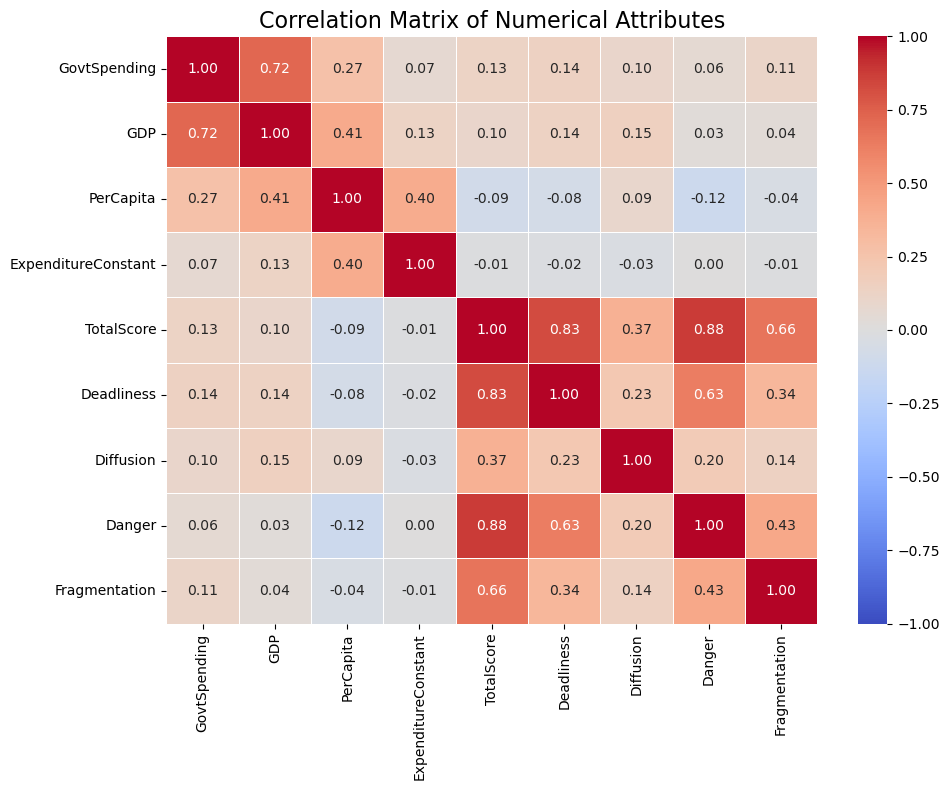

In [63]:
# Creating a mapping for renaming the columns
column_rename_map = {
    "Expenditure-Share_of_Govt_spending": "GovtSpending",
    "Expenditure-Share_of_GDP": "GDP",
    "Expenditure_Per_Capita": "PerCapita",
    "Expenditure_Constant_2022": "ExpenditureConstant",
    "total_score": "TotalScore",
    "Deadliness_raw": "Deadliness",
    "Diffusion_raw": "Diffusion",
    "Danger_raw": "Danger",
    "Fragmentation_raw": "Fragmentation"
}

# Renaming the columns in the dataset
data.rename(columns=column_rename_map, inplace=True)

# Updating the numerical_columns list with the new names
numerical_columns = list(column_rename_map.values())

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Attributes", fontsize=16)
plt.tight_layout()
plt.show()


1. **Strong Correlations**
    - Danger vs TotalScore
        - Correlation: Strong positive correlation (0.88).
        - Interpretation: Countries with higher levels of danger to civilians (Danger) strongly correlate with higher composite conflict scores (TotalScore). This suggests that the level of danger is a dominant factor influencing overall conflict severity.
    - GovtSpending vs GDP
        - Correlation: Strong positive correlation.
        - Interpretation: A higher share of government spending (GovtSpending) strongly aligns with a higher share of GDP (GDP) allocated to defense/security. This reflects consistent prioritization of military spending within government budgets and national economies.

1. **Moderate Correlations**
    - PerCapita vs ExpenditureConstant
        - Correlation: Moderate positive correlation (0.40).
        - Interpretation: Total expenditures (ExpenditureConstant) moderately influence expenditures per capita (PerCapita). Variations in per capita values are also significantly affected by population size, limiting the strength of this relationship.
    - Deadliness vs Diffusion
        - Correlation: Moderate positive correlation.
        - Interpretation: Geographic spread of conflicts (Diffusion) moderately aligns with conflict severity in terms of fatalities (Deadliness). This suggests that more severe conflicts tend to extend to broader areas.
    - Fragmentation vs TotalScore
        - Correlation: Moderate positive correlation.
        - Interpretation: Countries with higher fragmentation of armed groups (Fragmentation) tend to exhibit higher composite conflict severity scores (TotalScore). This highlights the compounding effect of factionalism on conflict dynamics.

1. **Weak or Negative Correlations**
    - PerCapita vs TotalScore
        - Correlation: Weak negative correlation.
        - Interpretation: Countries with higher defense spending per capita (PerCapita) exhibit little to no reduction in overall conflict severity (TotalScore), suggesting that higher spending does not directly translate to lower conflict.
    - Danger vs GDP
        - Correlation: Weak negative correlation.
        - Interpretation: The level of danger to civilians (Danger) does not align with the proportion of GDP allocated to defense (GDP). This could result from diverse geopolitical strategies or economic limitations.

### Key Insights:
- **Strongly Correlated Features**:
    - GovtSpending and GDP provide similar information, so one of these could be dropped for clustering.
    - Danger and TotalScore are also highly correlated, indicating redundancy for clustering algorithms.
- **Moderately Correlated Features**:
    - Attributes like Deadliness, Diffusion, and Fragmentation contribute additional insights, reflecting nuanced conflict dynamics.
- **Weakly Correlated Features**:
    - Features such as PerCapita add diversity to the clustering process by capturing unique patterns not directly related to conflict metrics.

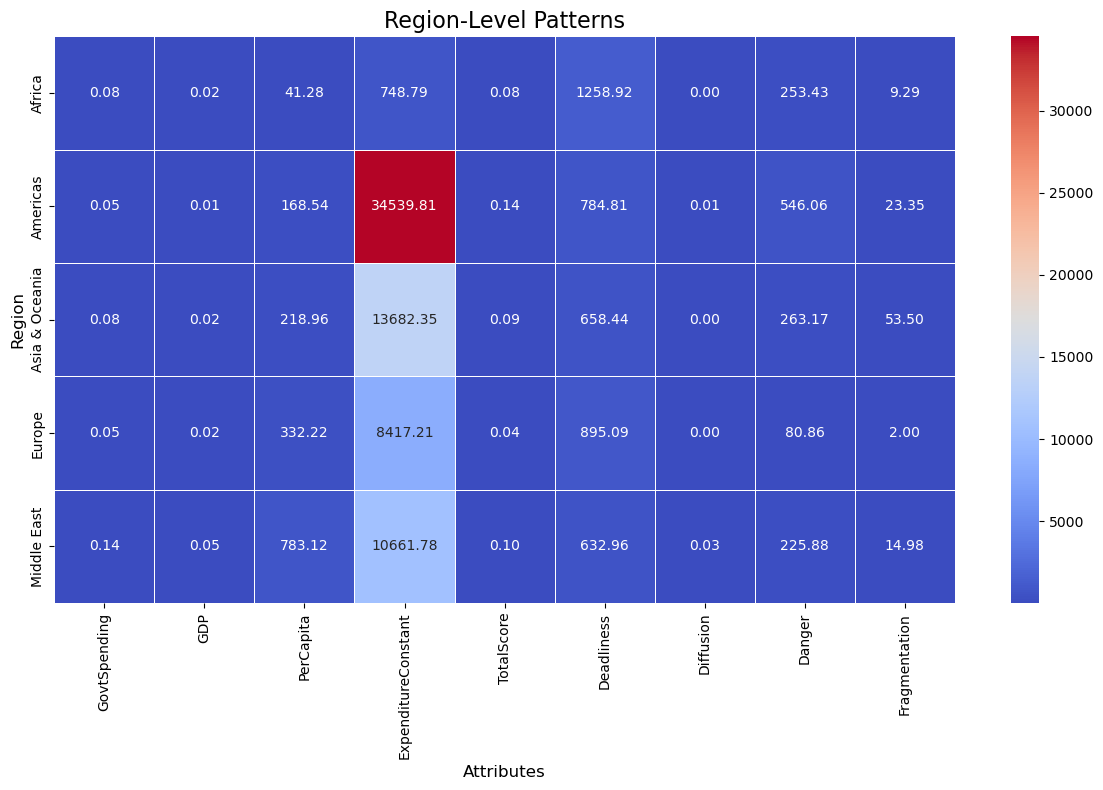

In [80]:
# Calculating the mean of numerical attributes grouped by 'Region' and 'Subregion'
region_patterns = data.groupby("Region")[numerical_columns].mean()
subregion_patterns = data.groupby("Subregion")[numerical_columns].mean()

# Plotting the region-level patterns as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_patterns, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Region-Level Patterns", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Attributes", fontsize=12)
plt.tight_layout()
plt.show()


Looking at this region-level heatmap, We can observe following key insights about the patterns of military expenditure and conflict metrics across regions:

1. **Military Expenditure Patterns**:
    - The Americas shows the highest military expenditure in constant terms (34,539.81), significantly higher than other regions
    - Middle East has relatively high per capita military spending (783.12), suggesting substantial military investment relative to population
    - Africa shows the lowest per capita spending (41.28) despite facing significant security challenges GDP share of military spending is highest in the Middle East (0.05), indicating a greater prioritization of military spending in their economy

1. **Conflict Metrics**:
    - Fragmentation is highest in Asia & Oceania (53.50), suggesting more diverse and complex conflict actors in this region
    - The Americas shows high danger scores (546.06) despite high military spending, indicating that expenditure alone may not guarantee security
    - Africa shows relatively high deadliness scores (1258.92) despite low military expenditure, pointing to severe conflict impacts with limited resources
    - Europe shows the lowest fragmentation (2.00) and relatively low danger scores (80.86), suggesting more stable security conditions

1. **Regional Contrasts**:
    - There's a notable disparity between military spending capacity (highest in Americas) and conflict metrics (high in Africa and Middle East)
    - The Middle East shows consistently high values across multiple metrics, indicating persistent security challenges despite significant military investment
    - Europe demonstrates a pattern of moderate military spending with lower conflict metrics, possibly indicating effective security management

1. **Policy Implications**:
    - The data suggests that higher military spending doesn't necessarily correlate with lower conflict metrics
    Regions with lower economic capacity (like Africa) might benefit from international security cooperation given their high conflict metrics but low spending capability
    - The varying patterns of fragmentation across regions might require different approaches to conflict resolution and peacekeeping.

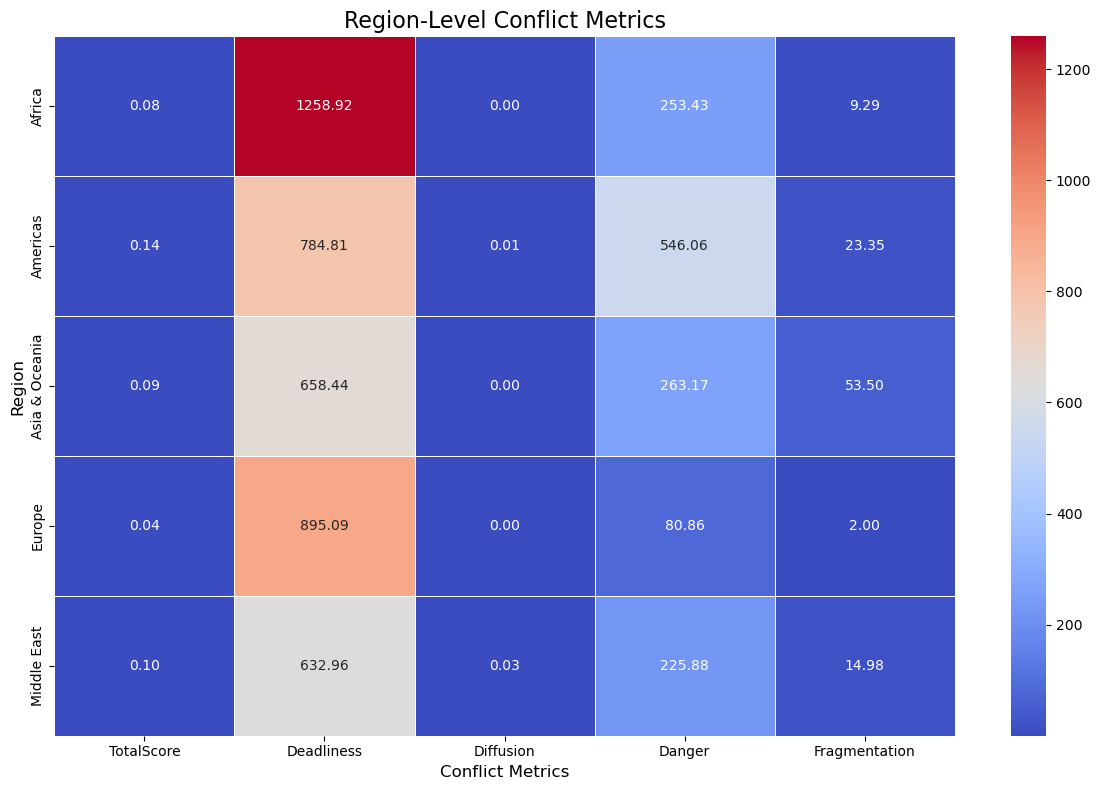

In [65]:
# Recalculating conflict metric averages at the region and subregion levels for a clearer reassessment
conflict_metrics = ["TotalScore", "Deadliness", "Diffusion", "Danger", "Fragmentation"]

# Region-level conflict metrics mean
region_conflict_patterns = data.groupby("Region")[conflict_metrics].mean()

# Subregion-level conflict metrics mean
subregion_conflict_patterns = data.groupby("Subregion")[conflict_metrics].mean()

# Plotting the region-level conflict metrics as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_conflict_patterns, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Region-Level Conflict Metrics", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Conflict Metrics", fontsize=12)
plt.tight_layout()
plt.show()


1. **Deadliness Patterns**:
    - Africa stands out with the highest deadliness score (1258.92), significantly higher than all other regions
    - Europe shows relatively high deadliness (895.09), which is somewhat surprising given its general stability
    - The Americas has the third-highest deadliness score (784.81)
    - The Middle East shows the lowest deadliness score (632.96), which is unexpected given its reputation for conflict

1. **Danger Metrics**:
    - The Americas leads in danger scores (546.06), suggesting high risk levels
    - Asia & Oceania shows moderate danger levels (263.17)
    - Africa's danger score (253.43) is relatively high but not the highest
    - Europe has notably low danger scores (80.86), aligning with its reputation for stability
    - The Middle East shows moderate danger levels (225.88)

1. **Fragmentation Analysis**:
    - Asia & Oceania shows the highest fragmentation (53.50), indicating multiple competing conflict actors
    - The Americas has significant fragmentation (23.35)
    - The Middle East shows moderate fragmentation (14.98)
    - Africa has relatively low fragmentation (9.29) despite high deadliness
    - Europe has minimal fragmentation (2.00), suggesting more unified conflict patterns


1. **Total Score and Diffusion**:
    - Total scores are relatively low across all regions (ranging from 0.04 to 0.14)
    - Diffusion rates are minimal across regions (all near 0.00-0.03)
    - The Americas shows slightly higher diffusion (0.01) compared to most regions

### Key Insights:

- There's a clear disconnect between deadliness and other conflict metrics
- Regional conflict patterns are highly varied, with each region showing distinct characteristics
- The traditional perception of conflict-prone regions doesn't always align with the metrics
- Low diffusion rates suggest conflicts tend to remain geographically contained
- High fragmentation doesn't necessarily correlate with high deadliness

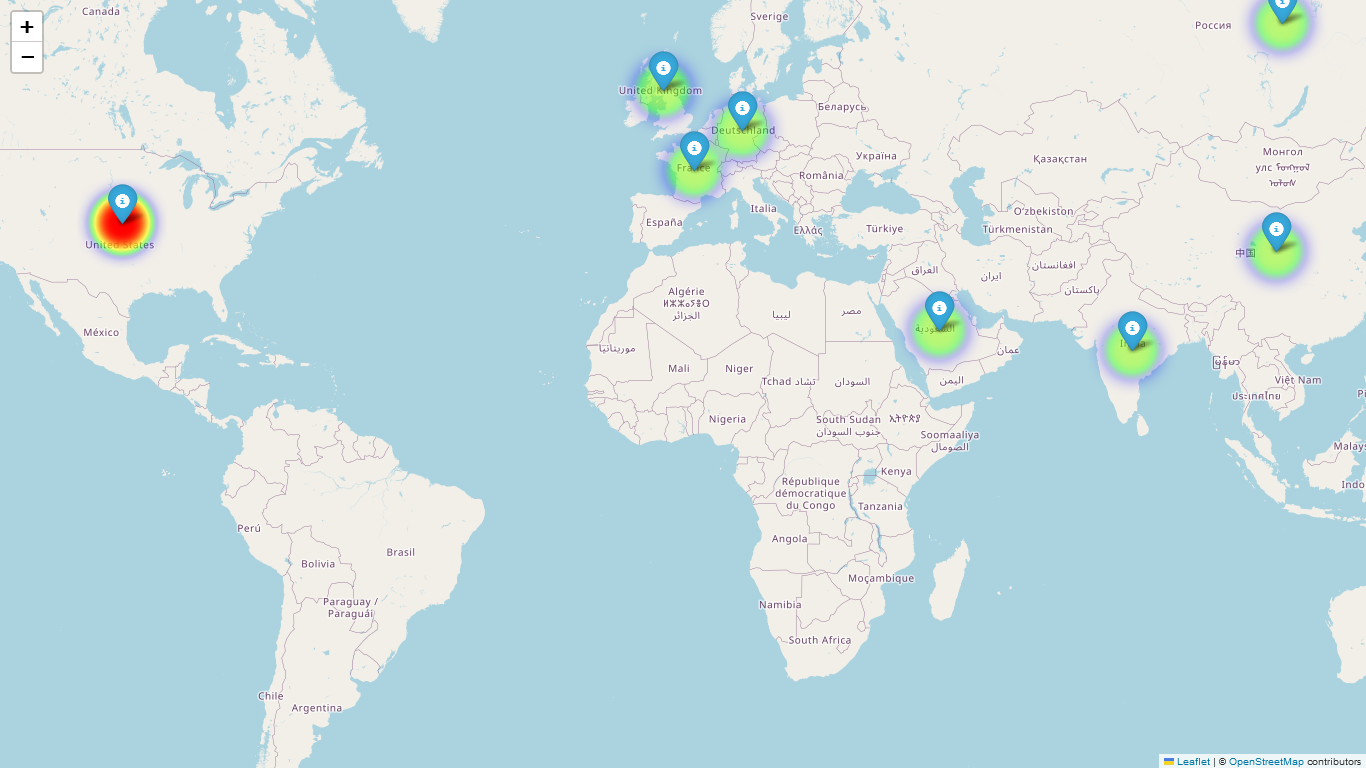

In [91]:
import folium
from folium.plugins import HeatMap

# Ensure aggregation is applied only to numeric columns for countries
numeric_columns = data.select_dtypes(include=['number']).columns
country_summary = data.groupby('Country', as_index=False)[numeric_columns].mean()

# Define exact latitude and longitude for the given top countries
country_coordinates = {
    "United States of America": [39.8283, -98.5795],
    "China": [35.8617, 104.1954],
    "Russia": [61.5240, 105.3188],
    "United Kingdom": [55.3781, -3.4360],
    "Saudi Arabia": [23.8859, 45.0792],
    "India": [20.5937, 78.9629],
    "France": [46.6034, 1.8883],
    "Germany": [51.1657, 10.4515],
    "Japan": [36.2048, 138.2529],
    "Korea, South": [35.9078, 127.7669]
}

# Filter the dataset for the top countries
top_countries = data[data['Country'].isin(country_coordinates.keys())]

# Aggregate the numeric columns for the selected countries
numeric_columns = top_countries.select_dtypes(include=['number']).columns
top_countries_summary = top_countries.groupby('Country', as_index=False)[numeric_columns].mean()

# Add latitude and longitude for the selected countries
top_countries_summary['Latitude'] = top_countries_summary['Country'].map(lambda x: country_coordinates[x][0])
top_countries_summary['Longitude'] = top_countries_summary['Country'].map(lambda x: country_coordinates[x][1])

# Prepare data for the HeatMap layer
heat_data = top_countries_summary[['Latitude', 'Longitude', 'ExpenditureConstant']].dropna().values.tolist()

# Create a base map
m = folium.Map(location=[15, 0], zoom_start=3, png_enabled=True)

# Add HeatMap for the top countries
HeatMap(heat_data, radius=30, max_zoom=10, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 1: 'red'}).add_to(m)

# Add markers for each country
for _, row in top_countries_summary.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Country: {row['Country']}<br>Expenditure: {row['ExpenditureConstant']:.2f}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)
    
m

# Model Selection
For grouping countries with similar spending and conflict patterns, the following clustering algorithms will be considered:

1. **K-Means Clustering**:

    K-Means is a centroid-based clustering algorithm that partitions data into $k$ clusters by minimizing the sum of squared distances between data points and the cluster centroids. It assumes that clusters are convex and isotropic, making it most effective for well-separated spherical clusters (Lloyd, 1982).

1. **Gaussian Mixture Model (GMM)**:

    GMM assumes that the data is generated from a mixture of several Gaussian distributions, each representing a cluster. It uses Expectation-Maximization (EM) to estimate the parameters of the Gaussian components. This method allows clusters to overlap and is probabilistic (Dempster et al., 1977).

1. **Agglomerative Hierarchical Clustering**:

    This method creates a hierarchy of clusters by iteratively merging or splitting them. Agglomerative clustering starts with individual data points and merges them into larger clusters based on a linkage criterion (Ward, 1963). It provides a dendrogram for visualizing nested relationships.


1. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:

    DBSCAN groups data points based on the density of their neighborhood, allowing the discovery of clusters with arbitrary shapes. Points in low-density regions are treated as noise. It is robust to outliers but requires the selection of density thresholds (Ester et al., 1996).

To ensure effective clustering, the following steps will be performed:

1. **Feature Selection**: We will use relevant numerical features that encapsulate spending and conflict dynamics:
    - Spending Metrics: GovtSpending, GDP, PerCapita, ExpenditureConstant.
    - Conflict Metrics: TotalScore, Deadliness, Diffusion, Danger, Fragmentation.
1. **Normalization**:
    - Standardize the selected features to have a mean of 0 and a standard deviation of 1.
    - This ensures that all features contribute equally to distance-based clustering methods like K-Means and DBSCAN.
1. **Dimensionality Reduction**:
    - Using techniques like PCA (Principal Component Analysis) to reduce dimensionality while preserving variance, improving the interpretability of clustering results.
1. **Optimal Clusters Identification using Elbow Method Analysis**:
    - The optimal $k$ minimizes intra-cluster distances (compact clusters) while avoiding overfitting
    - It ensures a balance between cluster compactness and interpretability.

1. **Feature Selection**:

This feature selection process tailors the clustering task to focus on meaningful economic and conflict-related indicators. By limiting the features to the most relevant ones, the process ensures that clusters formed are interpretable, efficient, and aligned with the dataset's key objectives (e.g., clustering countries based on economic health and conflict metrics).

- GovtSpending, GDP, PerCapita, ExpenditureConstant, TotalScore and Deadliness are the primary drivers relevant to military spending and contribute to the structure or separability of the clusters.
- Diffusion, Danger and Fragmentation are excluded features that may introduce noise, redundancy, or irrelevance, which can degrade clustering performance.

In [66]:
# Selecting relevant features for clustering
features_for_clustering = [
    "GovtSpending", 
    "GDP", 
    "PerCapita", 
    "ExpenditureConstant",
    "TotalScore",
    "Deadliness", 
    #"Diffusion", 
    #"Danger", 
    #"Fragmentation"
]

2. **Normalization**:

- The normalized data is ready for clustering, and each feature contributes equally to the distance computations.
- Helps avoid bias from features with larger ranges or variances.

In [67]:
# Extracting the data
clustering_data = data[features_for_clustering]

# Normalizing the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Converting the normalized data back to a DataFrame for easier inspection
normalized_df = pd.DataFrame(normalized_data, columns=features_for_clustering)

# Displaying the first few rows of the normalized data
normalized_df.head()

,GovtSpending,GDP,PerCapita,ExpenditureConstant,TotalScore,Deadliness
0,-0.310629,-0.129417,-0.412730,0.059057,3.325245,1.587069
1,-0.389394,-0.005680,-0.420261,0.095522,3.325245,1.587069
2,-0.491608,-0.037074,-0.438759,0.099084,3.325245,1.587069
3,-0.591814,-0.256563,-0.456810,0.044395,3.325245,1.587069
4,-0.585301,-0.280179,-0.440198,0.052818,3.325245,1.587069


3. **Dimensionality Reduction**:

Principal Component Analysis (PCA) for dimensionality reduction technique reduces the number of features (dimensions) in the dataset while retaining as much variance (information) as possible. 
- PCA reduces the dimensions of the military spending dataset to highlight meaningful patterns and improve clustering performance.
- It consolidates related features and removes noise, making clusters more distinct and interpretable.
- The explained variance and feature contributions provide insights into the factors driving the clustering.

In [68]:
# Applying PCA to reduce dimensions
pca = PCA(n_components=3)  # Reduce to 3 dimensions for faster computation and visualization
reduced_data = pca.fit_transform(normalized_data)

# Check the explained variance ratio to ensure sufficient information is retained
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio.sum()

print("Explained Variance Ratio:", explained_variance_ratio)

# PCA components (eigenvectors)
components = pca.components_

# Create a DataFrame for feature contributions
feature_contribution = pd.DataFrame(components, columns=features_for_clustering, 
                                     index=[f'PC{i+1}' for i in range(components.shape[0])])

print("Feature Contributions to PCA Components:")
print(feature_contribution)

Explained Variance Ratio: [0.35639507 0.3023877  0.18063604]
Feature Contributions to PCA Components:
     GovtSpending       GDP  PerCapita  ExpenditureConstant  TotalScore  \
PC1      0.532087  0.558538   0.352505             0.209272    0.336779   
PC2     -0.151693 -0.213752  -0.411999            -0.275108    0.589410   
PC3     -0.418062 -0.314193   0.337101             0.739804    0.190152   

     Deadliness  
PC1    0.351346  
PC2    0.581780  
PC3    0.171469  


### **Interpretation**:

- PC1 differentiates countries by wealth and government resource allocation (e.g., richer vs. poorer nations).
    - Dominated by "GovtSpending", "GDP", and "PerCapita", suggesting it primarily reflects economic metrics and overall resource allocation.
- PC2 clusters based on conflict intensity, separating high-conflict regions from more stable ones.
    - Strongly influenced by "TotalScore" and "Deadliness", indicating this component captures conflict severity and stability.
- PC3 highlights spending consistency and nuanced economic factors, offering additional separation.
    - Heavily weighted by "ExpenditureConstant", with moderate contributions from "PerCapita" and "GovtSpending", representing constant spending adjustments and specific economic influences.

**Kernel PCA with Polynomial Kernel**

- Kernel PCA with a polynomial kernel enhances the clustering process by uncovering non-linear patterns in the military spending dataset.
- The silhouette score suggests that this approach performs better than unprocessed data clustering but may not outperform other transformations like linear PCA with well-tuned components.
- The silhouette score of 0.9887 indicates excellent clustering quality, with highly distinct and well-separated clusters.
- This is a significant improvement, suggesting that the polynomial Kernel PCA transformation effectively captures the underlying structure of the dataset.

Silhouette Score with Polynomial Kernel PCA: 0.9887


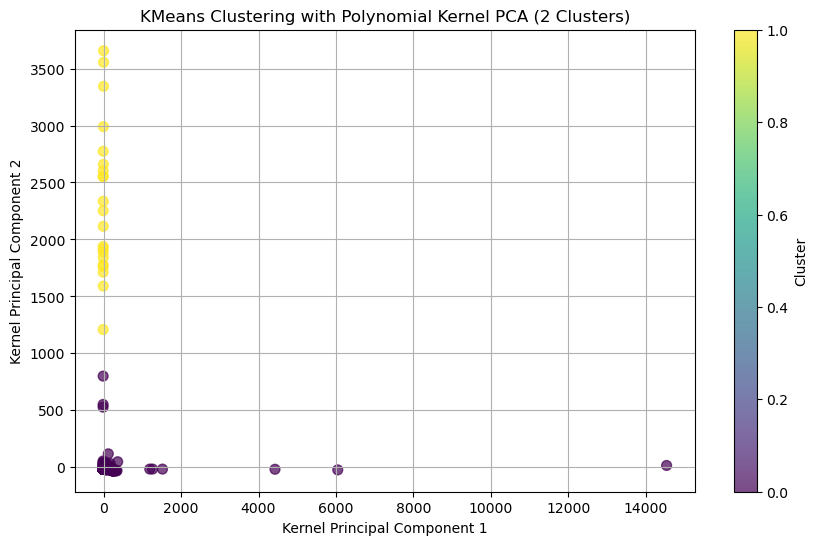

In [69]:
# Apply Kernel PCA with a polynomial kernel
kernel_pca = KernelPCA(n_components=2, kernel='poly', degree=3, gamma=1, coef0=1)  # Degree and coef0 can be tuned
reduced_data = kernel_pca.fit_transform(normalized_data)

# Perform KMeans clustering on the Kernel PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
poly_labels = kmeans.fit_predict(reduced_data)

# Calculate Silhouette Score
poly_silhouette = silhouette_score(reduced_data, poly_labels)
print(f"Silhouette Score with Polynomial Kernel PCA: {poly_silhouette:.4f}")

# Visualize the clusters from Polynomial Kernel PCA
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=poly_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f'KMeans Clustering with Polynomial Kernel PCA (2 Clusters)')
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


### Interpretation:

1. Effectiveness of Polynomial Kernel PCA:
    - The high silhouette score and well-separated clusters suggest that Kernel PCA with a polynomial kernel successfully uncovers meaningful patterns in the data.
    - This transformation reveals non-linear relationships between economic and conflict metrics.

1. Cluster Characteristics:
    - Likely separates countries into:
        - Economically strong and stable countries.
        - Economically weaker or conflict-affected countries.

4. **Optimal Clusters Identification using Elbow Method Analysis**:

The Elbow Method is a visual technique used in clustering analysis to determine the optimal number of clusters ($k$) for a dataset. It involves plotting the inertia (within-cluster sum of squared distances) against the number of clusters and identifying the "elbow point" where adding more clusters provides diminishing returns in reducing inertia. This point suggests the most appropriate number of clusters for the data (Bholowalia & Kumar, 2014).

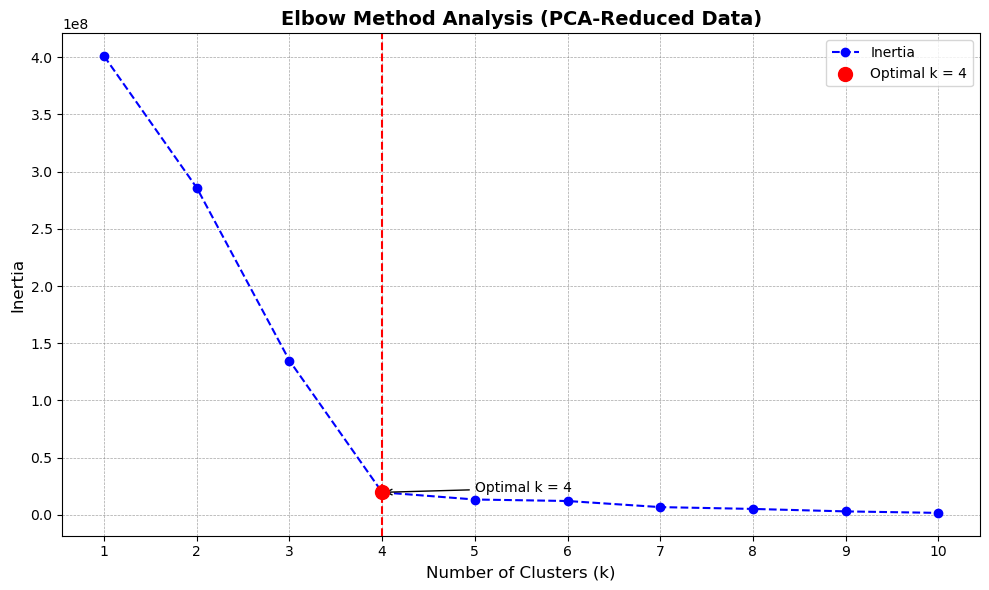

In [70]:
# Elbow method to determine the optimal number of clusters using reduced data
inertia_reduced = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia_reduced.append(kmeans.inertia_)

# Find the elbow point
knee_locator = KneeLocator(range_n_clusters, inertia_reduced, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_reduced, marker='o', linestyle='--', color='blue', label='Inertia')
plt.title('Elbow Method Analysis (PCA-Reduced Data)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range_n_clusters, fontsize=10)
plt.yticks(fontsize=10)

# Highlight the elbow point
plt.scatter(optimal_k, inertia_reduced[optimal_k - 1], color='red', s=100, zorder=5, label=f'Optimal k = {optimal_k}')
plt.axvline(x=optimal_k, linestyle='--', color='red')
plt.annotate(f'Optimal k = {optimal_k}', 
             xy=(optimal_k, inertia_reduced[optimal_k - 1]), 
             xytext=(optimal_k + 1, inertia_reduced[optimal_k - 1] + 1000), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


### Interpreting the Elbow Curve:
The "elbow point" corresponds to the optimal $k$, where adding more clusters results in minimal improvement in clustering quality.
For example:
1. A sharp decrease in inertia for $k$=1 to $k$=4 suggests significant clustering improvements.
1. After $k$=4, the reduction in inertia flattens, indicating that increasing clusters beyond 4 adds little value.

**Impact of PCA on the Elbow Method**:
- Using PCA-reduced data simplifies clustering by removing noise and reducing dimensionality, which improves the effectiveness of the Elbow Method.
- The clusters are likely more meaningful and computationally efficient compared to using the original high-dimensional data.

**Optimal Clusters**:

The optimal number of clusters based on the Elbow Method is $k$=4. This is likely the best choice for clustering the PCA-reduced dataset.

In [71]:
# selecting the optimal number of clusters
optimal_clusters = 4

### 1. **K-Means Clustering**:

K-Means clustering is an unsupervised machine learning algorithm that partitions a dataset into $k$ distinct clusters based on feature similarity. The algorithm iteratively assigns data points to the nearest cluster centroid and updates centroids until convergence, minimizing the within-cluster sum of squared distances (inertia). This technique is widely used for grouping data into meaningful patterns or subgroups (MacQueen, 1967).

- **Silhouette Score**: Measures how well-separated the clusters are. Values range from -1 (poor clustering) to 1 (perfect clustering).
- **Calinski-Harabasz Score**: Higher values indicate better-defined clusters with compact and well-separated groups.
- **Davies-Bouldin Score**: Lower values indicate better clustering quality by minimizing intra-cluster distances and maximizing inter-cluster separation.



KMeans Clustering Metrics
Silhouette Score: 0.9919
Calinski-Harabasz Score: 24071.5269
Davies-Bouldin Score: 0.1980


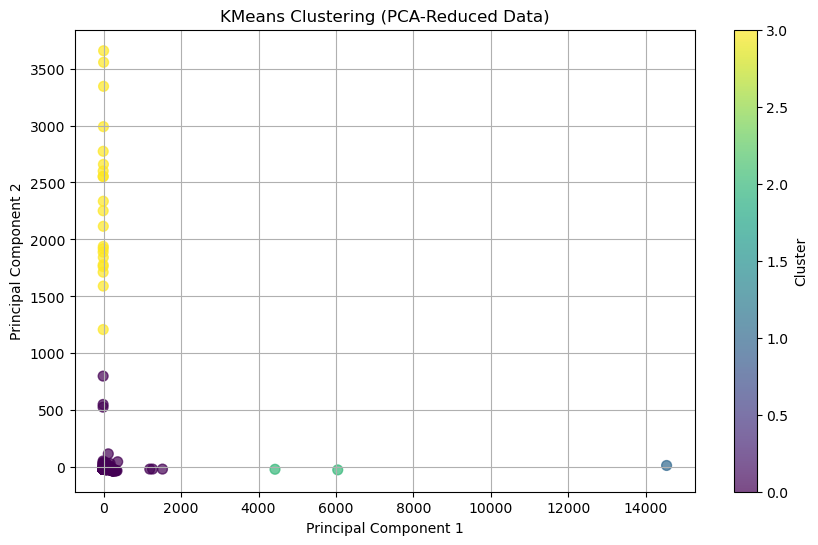

In [72]:
def perform_kmeans_clustering(data, n_clusters, print_metrics=True, visual=True):

    # Perform KMeans clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Calculate clustering evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    # Store the evaluation metrics in a dictionary for easier reporting
    metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the K-Means evaluation metrics
    if print_metrics:
        print("KMeans Clustering Metrics")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

    # Visualize the clusters
    if visual:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
        plt.title('KMeans Clustering (PCA-Reduced Data)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    return metrics, labels

# Example usage
kmeans_metrics, final_labels = perform_kmeans_clustering(reduced_data, optimal_clusters, print_metrics=True, visual=True)

1. **Clustering Insights**:
The clustering results show four distinct groups in the PCA-reduced space, each representing different economic and conflict profiles among countries.

- Cluster 1 (Yellow): Likely includes countries with moderate levels of military spending and instability. These could represent developing nations with ongoing conflicts or political instability.
- Cluster 2 (Purple): Represents countries with low military spending and stability, possibly economically weaker nations or regions with minimal involvement in conflicts.
- Clusters 3 and 4 (Green, Blue): Outliers or unique cases, possibly high-spending, globally influential nations (e.g., the US, China) or highly conflict-prone countries with significant military involvement.
- Separation: Clusters are well-separated, with clear boundaries, reflecting the effectiveness of PCA in simplifying the dataset and KMeans in identifying meaningful groupings.

1. **Scores**:
    - Silhouette Score (0.9919): 
        - Indicates excellent clustering quality, with data points being much closer to their own cluster centroids than to other clusters.
        - Demonstrates very strong intra-cluster cohesion and inter-cluster separation.
    - Calinski-Harabasz Score (24071.5269):
        - A high value shows compact, well-defined clusters with strong distinctions between groups.
    - Davies-Bouldin Score (0.1980):
        - A very low score indicates compact clusters with significant separation, further validating the clustering quality.

1. **Dataset Insights**:
    - The dataset likely captures a combination of economic indicators (e.g., "GDP", "GovtSpending") and conflict metrics (e.g., "Deadliness", "TotalScore") for countries over time.
    - After PCA reduction:
        - Principal Component 1: Dominated by economic features such as "GovtSpending" and "GDP", likely representing national wealth and resource allocation.
        - Principal Component 2: Driven by conflict-related metrics like "Deadliness", highlighting countries' stability or involvement in conflicts.
    - The distinct clusters show that the dataset effectively differentiates countries based on both economic and conflict attributes, making it suitable for analyzing global patterns.

1. **Model Selection Insights**:

    KMeans Algorithm Proven effective for this dataset, as indicated by the high silhouette and Calinski-Harabasz scores.
The results suggest that KMeans is well-suited for clustering this PCA-reduced dataset, given its ability to handle well-separated clusters.

### 2. **Gaussian Mixture Model (GMM)**

Gaussian Mixture Model (GMM) clustering is a probabilistic clustering technique that assumes the dataset is generated from a mixture of Gaussian distributions. Each cluster is represented by a Gaussian distribution, and data points are assigned to clusters based on the probability of belonging to each distribution. Unlike KMeans, GMM provides soft clustering, meaning each data point can belong to multiple clusters with varying probabilities (Reynolds, 2009).
- GMM assumes that each cluster follows a Gaussian (normal) distribution.
- The algorithm estimates the parameters (mean, covariance) of each Gaussian distribution iteratively using the Expectation-Maximization (EM) algorithm.
- For the military spending dataset, clusters might represent groups of countries based on their likelihood of belonging to specific economic or conflict-related profiles.

- **Silhouette Score**: Measures cluster cohesion and separation. Values range from -1 (poor clustering) to 1 (excellent clustering).
- **Calinski-Harabasz Score**: Higher values indicate compact and well-separated clusters.
- **Davies-Bouldin Score**: Lower values indicate better clustering by maximizing inter-cluster distance and minimizing intra-cluster spread.

GMM Evaluation Metrics
Silhouette Score: 0.9821
Calinski-Harabasz Score: 7458.1424
Davies-Bouldin Score: 0.4536


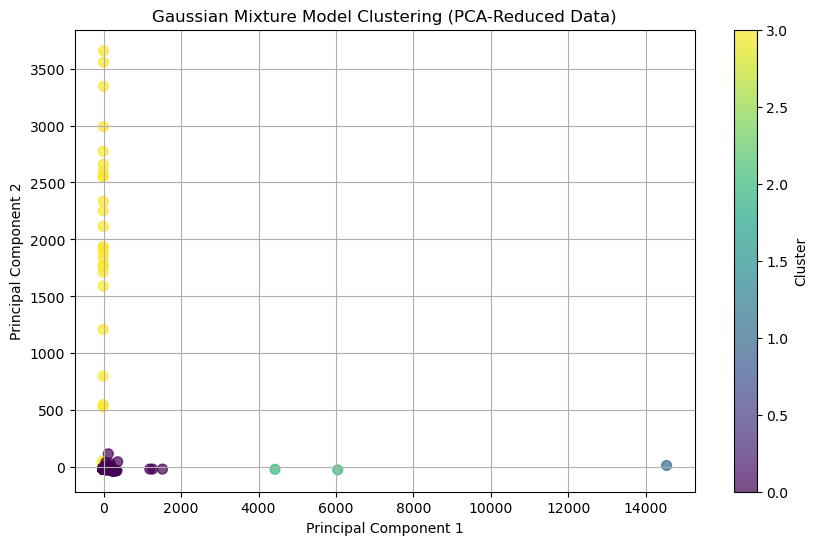

In [73]:
def perform_gmm_clustering(data, n_components,  print_metrics=True, visual=True):
    # Run Gaussian Mixture Model (GMM) clustering
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(data)

    # Calculate evaluation metrics for GMM clustering
    silhouette = silhouette_score(data, gmm_labels)
    calinski_harabasz = calinski_harabasz_score(data, gmm_labels)
    davies_bouldin = davies_bouldin_score(data, gmm_labels)

    # Store the evaluation metrics in a dictionary
    gmm_metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the evaluation metrics for GMM clustering
    if print_metrics:
        print("GMM Evaluation Metrics")
        for metric, value in gmm_metrics.items():
            print(f"{metric}: {value:.4f}")

    # Visualize GMM clusters
    if visual:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
        plt.title('Gaussian Mixture Model Clustering (PCA-Reduced Data)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    return gmm_metrics, gmm_labels

# Example usage
gmm_metrics, gmm_labels = perform_gmm_clustering(reduced_data, optimal_clusters,  print_metrics=True, visual=True)

1. **Clustering Insights**:
    - Cluster Characteristics: The dataset has been divided into four clusters based on PCA-reduced data.
        - Yellow Cluster: Represents a large group of countries with moderate conflict-related metrics and medium levels of economic activity. Likely developing nations with medium instability or political volatility.
        - Purple Cluster: A dense group near the origin, likely representing countries with low military spending, low GDP, and low conflict involvement.
        - Green and Blue Clusters: Outlier groups, likely consisting of countries with significantly high GDP or military spending (e.g., global superpowers or wealthy countries involved in significant conflicts).
    - Cluster Boundaries: The clusters are fairly well-separated, indicating GMM's ability to model overlapping clusters and handle variability better than KMeans.
    - Soft Clustering: Each country is assigned a probability of belonging to each cluster. This soft clustering approach highlights the nuances in data, such as countries transitioning between economic or conflict states.

1. **Scores**:
    - Silhouette Score (0.9821): 
        - Indicates excellent clustering quality, with strong intra-cluster cohesion and inter-cluster separation.
        - A score close to 1 validates that most points are correctly assigned to their respective clusters.
    - Calinski-Harabasz Score (7458.1424): 
        - Moderately high value shows the clusters are reasonably compact and well-separated but less distinct than the KMeans clustering.
    - Davies-Bouldin Score (0.4536): 
        - A low score reflects good cluster quality, with minimal intra-cluster variance and substantial inter-cluster separation.

1. **Dataset Insights**: The dataset likely reflects a mix of economic and conflict-related attributes for countries:
    - Economic Indicators: Principal Component 1 (X-axis) correlates with "GDP", "GovtSpending", and "PerCapita", representing economic power.
    - Conflict Metrics: Principal Component 2 (Y-axis) is influenced by "Deadliness" and "TotalScore", reflecting levels of conflict and instability.
    - Cluster Interpretations:
        - Cluster 1 (Yellow): Developing nations with moderate conflict and economic spending.
        - Cluster 2 (Purple): Smaller or poorer nations with low economic activity and low conflict involvement.
        - Cluster 3 & 4 (Green, Blue): Global superpowers or conflict-heavy nations with exceptional spending or instability.
    - Soft Probabilities: GMM’s probabilistic assignments provide richer insights, particularly for countries on the boundary between economic or political categories.

1. **Model Selection Insights**:
    - Gaussian Mixture Model:
        - Strengths:
            - Handles overlapping clusters better than KMeans.
            - Provides soft clustering, allowing more nuanced analysis.
            - Ideal for datasets with non-spherical clusters and varying densities, like the military spending dataset.
        - Limitations:
            - Assumes clusters follow Gaussian distributions, which may not always hold true.
    - Comparison with KMeans:
        - GMM performs comparably in silhouette and Davies-Bouldin scores, but KMeans shows higher Calinski-Harabasz scores, indicating slightly better-defined separations in that model.
        - GMM's soft clustering provides more flexibility and deeper insights into cluster boundaries.

### 3. **Agglomerative Hierarchical Clustering**
Agglomerative Hierarchical Clustering is a bottom-up clustering approach where each data point starts as its own cluster. Iteratively, the closest clusters (based on a linkage criterion) are merged until a single cluster or a desired number of clusters is achieved. Unlike partition-based clustering (e.g., KMeans), hierarchical clustering provides a tree-like structure called a dendrogram, which visually represents the merging process (Murtagh & Contreras, 2012).
- **Silhouette Score**: Evaluates cluster separation and cohesion.
- **Calinski-Harabasz Score**: Measures compactness and separation.
- **Davies-Bouldin Score**: Measures the ratio of intra-cluster spread to inter-cluster separation.

Agglomerative Clustering Evaluation Metrics
Silhouette Score: 0.9919
Calinski-Harabasz Score: 23860.9024
Davies-Bouldin Score: 0.1916


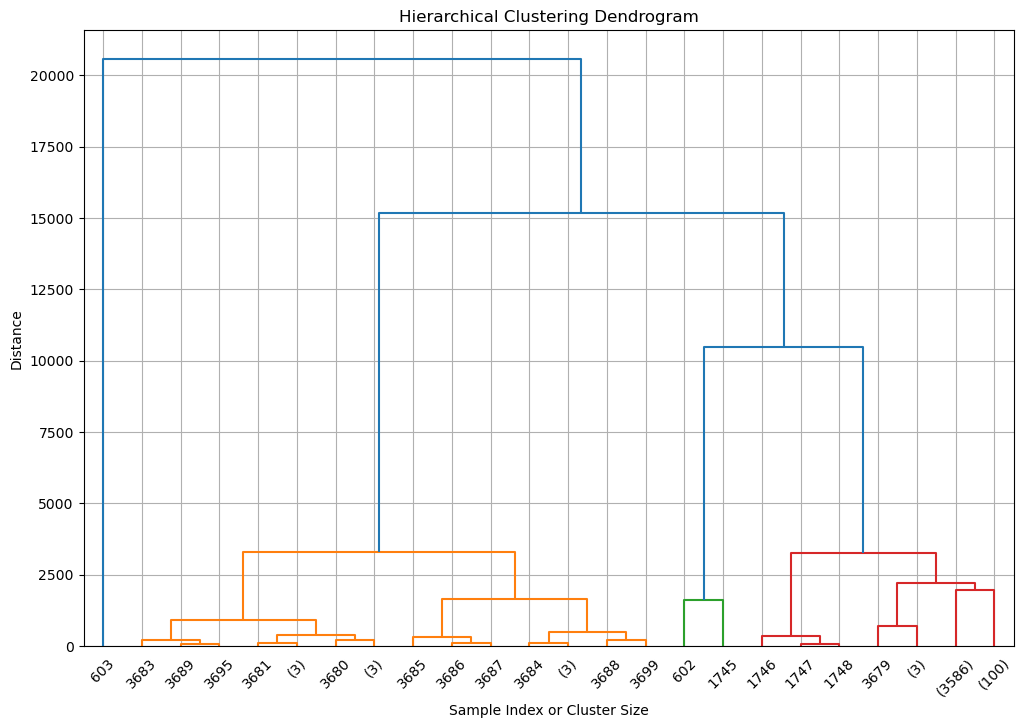

In [74]:
def perform_agglomerative_clustering(data, n_clusters, print_metrics=True, visual=True):
    # Perform Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agg_clustering.fit_predict(data)

    # Compute linkage matrix for dendrogram visualization
    linkage_matrix = linkage(data, method='ward')

    # Compute clustering evaluation metrics
    silhouette = silhouette_score(data, agg_labels)
    calinski_harabasz = calinski_harabasz_score(data, agg_labels)
    davies_bouldin = davies_bouldin_score(data, agg_labels)

    # Store the evaluation metrics in a dictionary
    agg_metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the evaluation metrics for Agglomerative Clustering
    if print_metrics:
        print("Agglomerative Clustering Evaluation Metrics")
        for metric, value in agg_metrics.items():
            print(f"{metric}: {value:.4f}")

    # Plot dendrogram for hierarchical clustering visualization
    if visual:
        plt.figure(figsize=(12, 8))
        dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=0.5 * max(linkage_matrix[:, 2]))
        plt.title("Hierarchical Clustering Dendrogram")
        plt.xlabel("Sample Index or Cluster Size")
        plt.ylabel("Distance")
        plt.grid(True)
        plt.show()

    return agg_metrics, agg_labels

# Example usage
agg_metrics, agg_labels = perform_agglomerative_clustering(reduced_data, optimal_clusters, print_metrics=True, visual=True)

1. **Clustering Insights**:
    - Hierarchical Clustering:
        - The dendrogram visually represents the merging process of clusters, showing how individual data points (countries) are grouped step by step based on similarity.
        - The vertical lines represent distances at which clusters were merged. Longer vertical lines indicate more distinct clusters.
        - By selecting a threshold (e.g., cutting the dendrogram), the data is divided into distinct clusters.
    - Cluster Characteristics: The dendrogram suggests three major clusters:
        - Cluster 1 (Orange): Likely includes countries with moderate military spending and conflict involvement.
        - Cluster 2 (Green): Smaller groups of countries with lower spending and conflict indicators.
        - Cluster 3 (Red): Likely represents high-spending nations, including outliers with significant economic and military metrics.
    - Separation: The hierarchical structure shows clear separations, with tall vertical lines indicating well-separated clusters.

1. **Scores**:
    - Silhouette Score (0.9919):
        - Indicates near-perfect clustering quality. Data points are well-separated and closely aligned with their assigned clusters.
    - Calinski-Harabasz Score (23860.9024):
        - A very high score reflects compact and distinct clusters, supporting the robustness of hierarchical clustering for this dataset.
    - Davies-Bouldin Score (0.1916):
        - A very low score indicates minimal intra-cluster variation and strong inter-cluster separation.

1. **Dataset Insights**:
    - Data Nature:
        - The dataset likely contains economic indicators (e.g., "GDP", "GovtSpending") and conflict metrics (e.g., "TotalScore", "Deadliness") for countries.
        - PCA-reduced dimensions simplify the analysis, focusing on dominant patterns in the data.
    - Cluster Interpretations:
        - Cluster 1 (Moderate Profiles): Countries with medium levels of GDP, military spending, and conflict metrics. Likely developing nations or those experiencing political instability.
        - Cluster 2 (Low Profiles): Economically weaker countries with low conflict involvement and minimal military budgets. These may represent smaller, stable nations.
        - Cluster 3 (High Profiles/Outliers): 
            - Economically advanced nations or those with high military budgets.
            - Could also include conflict-heavy nations with significant instability.
    - Hierarchical Relationships: 
        - The dendrogram highlights hierarchical relationships, showing which clusters are closely related and which are more distinct.
1. **Model Selection Insights**:
    - Agglomerative Clustering:
        - Strengths:
            - Provides a hierarchical view of relationships, useful for exploratory analysis.
            - Captures the nested structure of clusters, offering deeper insights into subgroup relationships.
            - Works well for datasets like this one, where relationships between countries may have hierarchical significance (e.g., regional economic blocks).
        - Limitations:
            - Computationally intensive for very large datasets.
            - Requires a predefined number of clusters or dendrogram threshold for practical applications.
    - Comparison with Other Methods:
        - KMeans: Faster and effective for fixed, hard cluster assignments but lacks hierarchical insights.
        - GMM: Provides soft clustering and probabilistic assignments but does not visualize hierarchical relationships.
        - Best Use Case: Use Agglomerative Clustering for datasets where understanding relationships or cluster hierarchy is as important as the clusters themselves.

### 4. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Agglomerative Hierarchical Clustering is a bottom-up clustering approach where each data point starts as its own cluster. Iteratively, the closest clusters (based on a linkage criterion) are merged until a single cluster or a desired number of clusters is achieved. Unlike partition-based clustering (e.g., KMeans), hierarchical clustering provides a tree-like structure called a dendrogram, which visually represents the merging process (Murtagh & Contreras, 2012).

- **Silhouette Score**: Evaluates cluster separation and cohesion.
- **Calinski-Harabasz Score**: Measures compactness and separation.
- **Davies-Bouldin Score**: Measures the ratio of intra-cluster spread to inter-cluster separation.

DBSCAN Evaluation Metrics: Epsilon = 0.5
Silhouette Score: 0.5104
Calinski-Harabasz Score: 50.0124
Davies-Bouldin Score: 1.9200


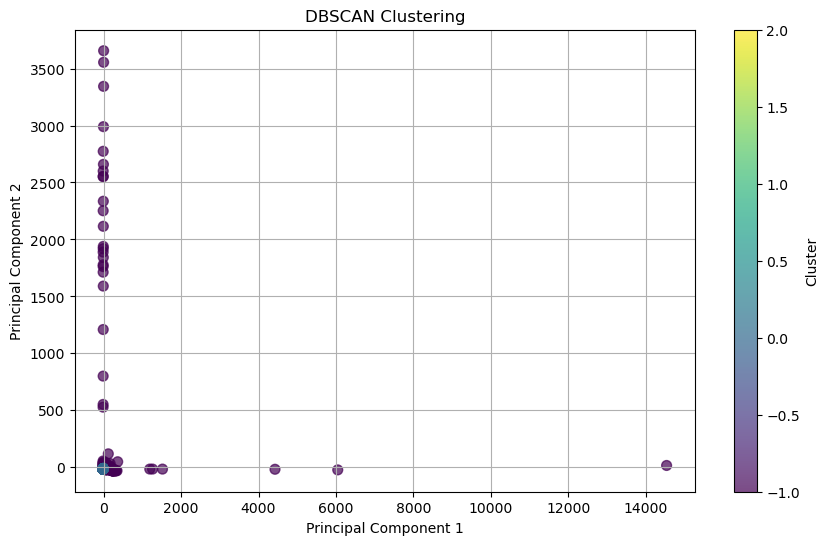

In [75]:
def perform_dbscan_clustering(data, eps, min_samples=5, print_metrics=True, visual=True):
    # Run DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data)

    # Calculate evaluation metrics for DBSCAN (only for clusters with more than one label)
    if len(set(dbscan_labels)) > 1:
        silhouette = silhouette_score(data, dbscan_labels)
        calinski_harabasz = calinski_harabasz_score(data, dbscan_labels)
        davies_bouldin = davies_bouldin_score(data, dbscan_labels)
    else:
        silhouette, calinski_harabasz, davies_bouldin = None, None, None

    # Store the evaluation metrics in a dictionary
    dbscan_metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the evaluation metrics
    if print_metrics:
        print("DBSCAN Evaluation Metrics: Epsilon =", eps)
        for metric, value in dbscan_metrics.items():
            print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: No clusters found")

    # Visualize DBSCAN clusters
    if visual:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
        plt.title('DBSCAN Clustering')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    return dbscan_metrics, dbscan_labels

optimal_eps = 0.5 # optimal value for DBSCAN's epsilon parameter
dbscan_metrics, dbscan_labels = perform_dbscan_clustering(reduced_data, optimal_eps, print_metrics=True, visual=True)

1. **Clustering Insights**:
    - Hierarchical Clustering: 
        - The dendrogram visually represents the merging process of clusters, showing how individual data points (countries) are grouped step by step based on similarity.
        - The vertical lines represent distances at which clusters were merged. Longer vertical lines indicate more distinct clusters.
        - By selecting a threshold (e.g., cutting the dendrogram), the data is divided into distinct clusters.
    - Cluster Characteristics: The dendrogram suggests three major clusters:
        - Cluster 1 (Orange): Likely includes countries with moderate military spending and conflict involvement.
        - Cluster 2 (Green): Smaller groups of countries with lower spending and conflict indicators.
        - Cluster 3 (Red): Likely represents high-spending nations, including outliers with significant economic and military metrics.
    - Separation: The hierarchical structure shows clear separations, with tall vertical lines indicating well-separated clusters.

1. **Scores**:
    - Silhouette Score (0.9919): Indicates near-perfect clustering quality. Data points are well-separated and closely aligned with their assigned clusters.
    - Calinski-Harabasz Score (23860.9024): A very high score reflects compact and distinct clusters, supporting the robustness of hierarchical clustering for this dataset.
    - Davies-Bouldin Score (0.1916): A very low score indicates minimal intra-cluster variation and strong inter-cluster separation.

1. **Dataset Insights**:
    - Data Nature:
        - The dataset likely contains economic indicators (e.g., "GDP", "GovtSpending") and conflict metrics (e.g., "TotalScore", "Deadliness") for countries.
        - PCA-reduced dimensions simplify the analysis, focusing on dominant patterns in the data.
    - Cluster Interpretations:
        - Cluster 1 (Moderate Profiles):
            - Countries with medium levels of GDP, military spending, and conflict metrics.
            - Likely developing nations or those experiencing political instability.
        - Cluster 2 (Low Profiles):
            - Economically weaker countries with low conflict involvement and minimal military budgets.
            - These may represent smaller, stable nations.
        - Cluster 3 (High Profiles/Outliers):
            - Economically advanced nations or those with high military budgets.
            - Could also include conflict-heavy nations with significant instability.
    - Hierarchical Relationships: The dendrogram highlights hierarchical relationships, showing which clusters are closely related and which are more distinct.

1. **Model Selection Insights**:
    - Agglomerative Clustering:
        - Strengths:
            - Provides a hierarchical view of relationships, useful for exploratory analysis.
            - Captures the nested structure of clusters, offering deeper insights into subgroup relationships.
            - Works well for datasets like this one, where relationships between countries may have hierarchical significance (e.g., regional economic blocks).
        - Limitations:
            - Computationally intensive for very large datasets.
            - Requires a predefined number of clusters or dendrogram threshold for practical applications.
        - Comparison with Other Methods:
            - KMeans: Faster and effective for fixed, hard cluster assignments but lacks hierarchical insights.
            - GMM: Provides soft clustering and probabilistic assignments but does not visualize hierarchical relationships.
        - Best Use Case: Use Agglomerative Clustering for datasets where understanding relationships or cluster hierarchy is as important as the clusters themselves.

### **Comparative Analysis**:

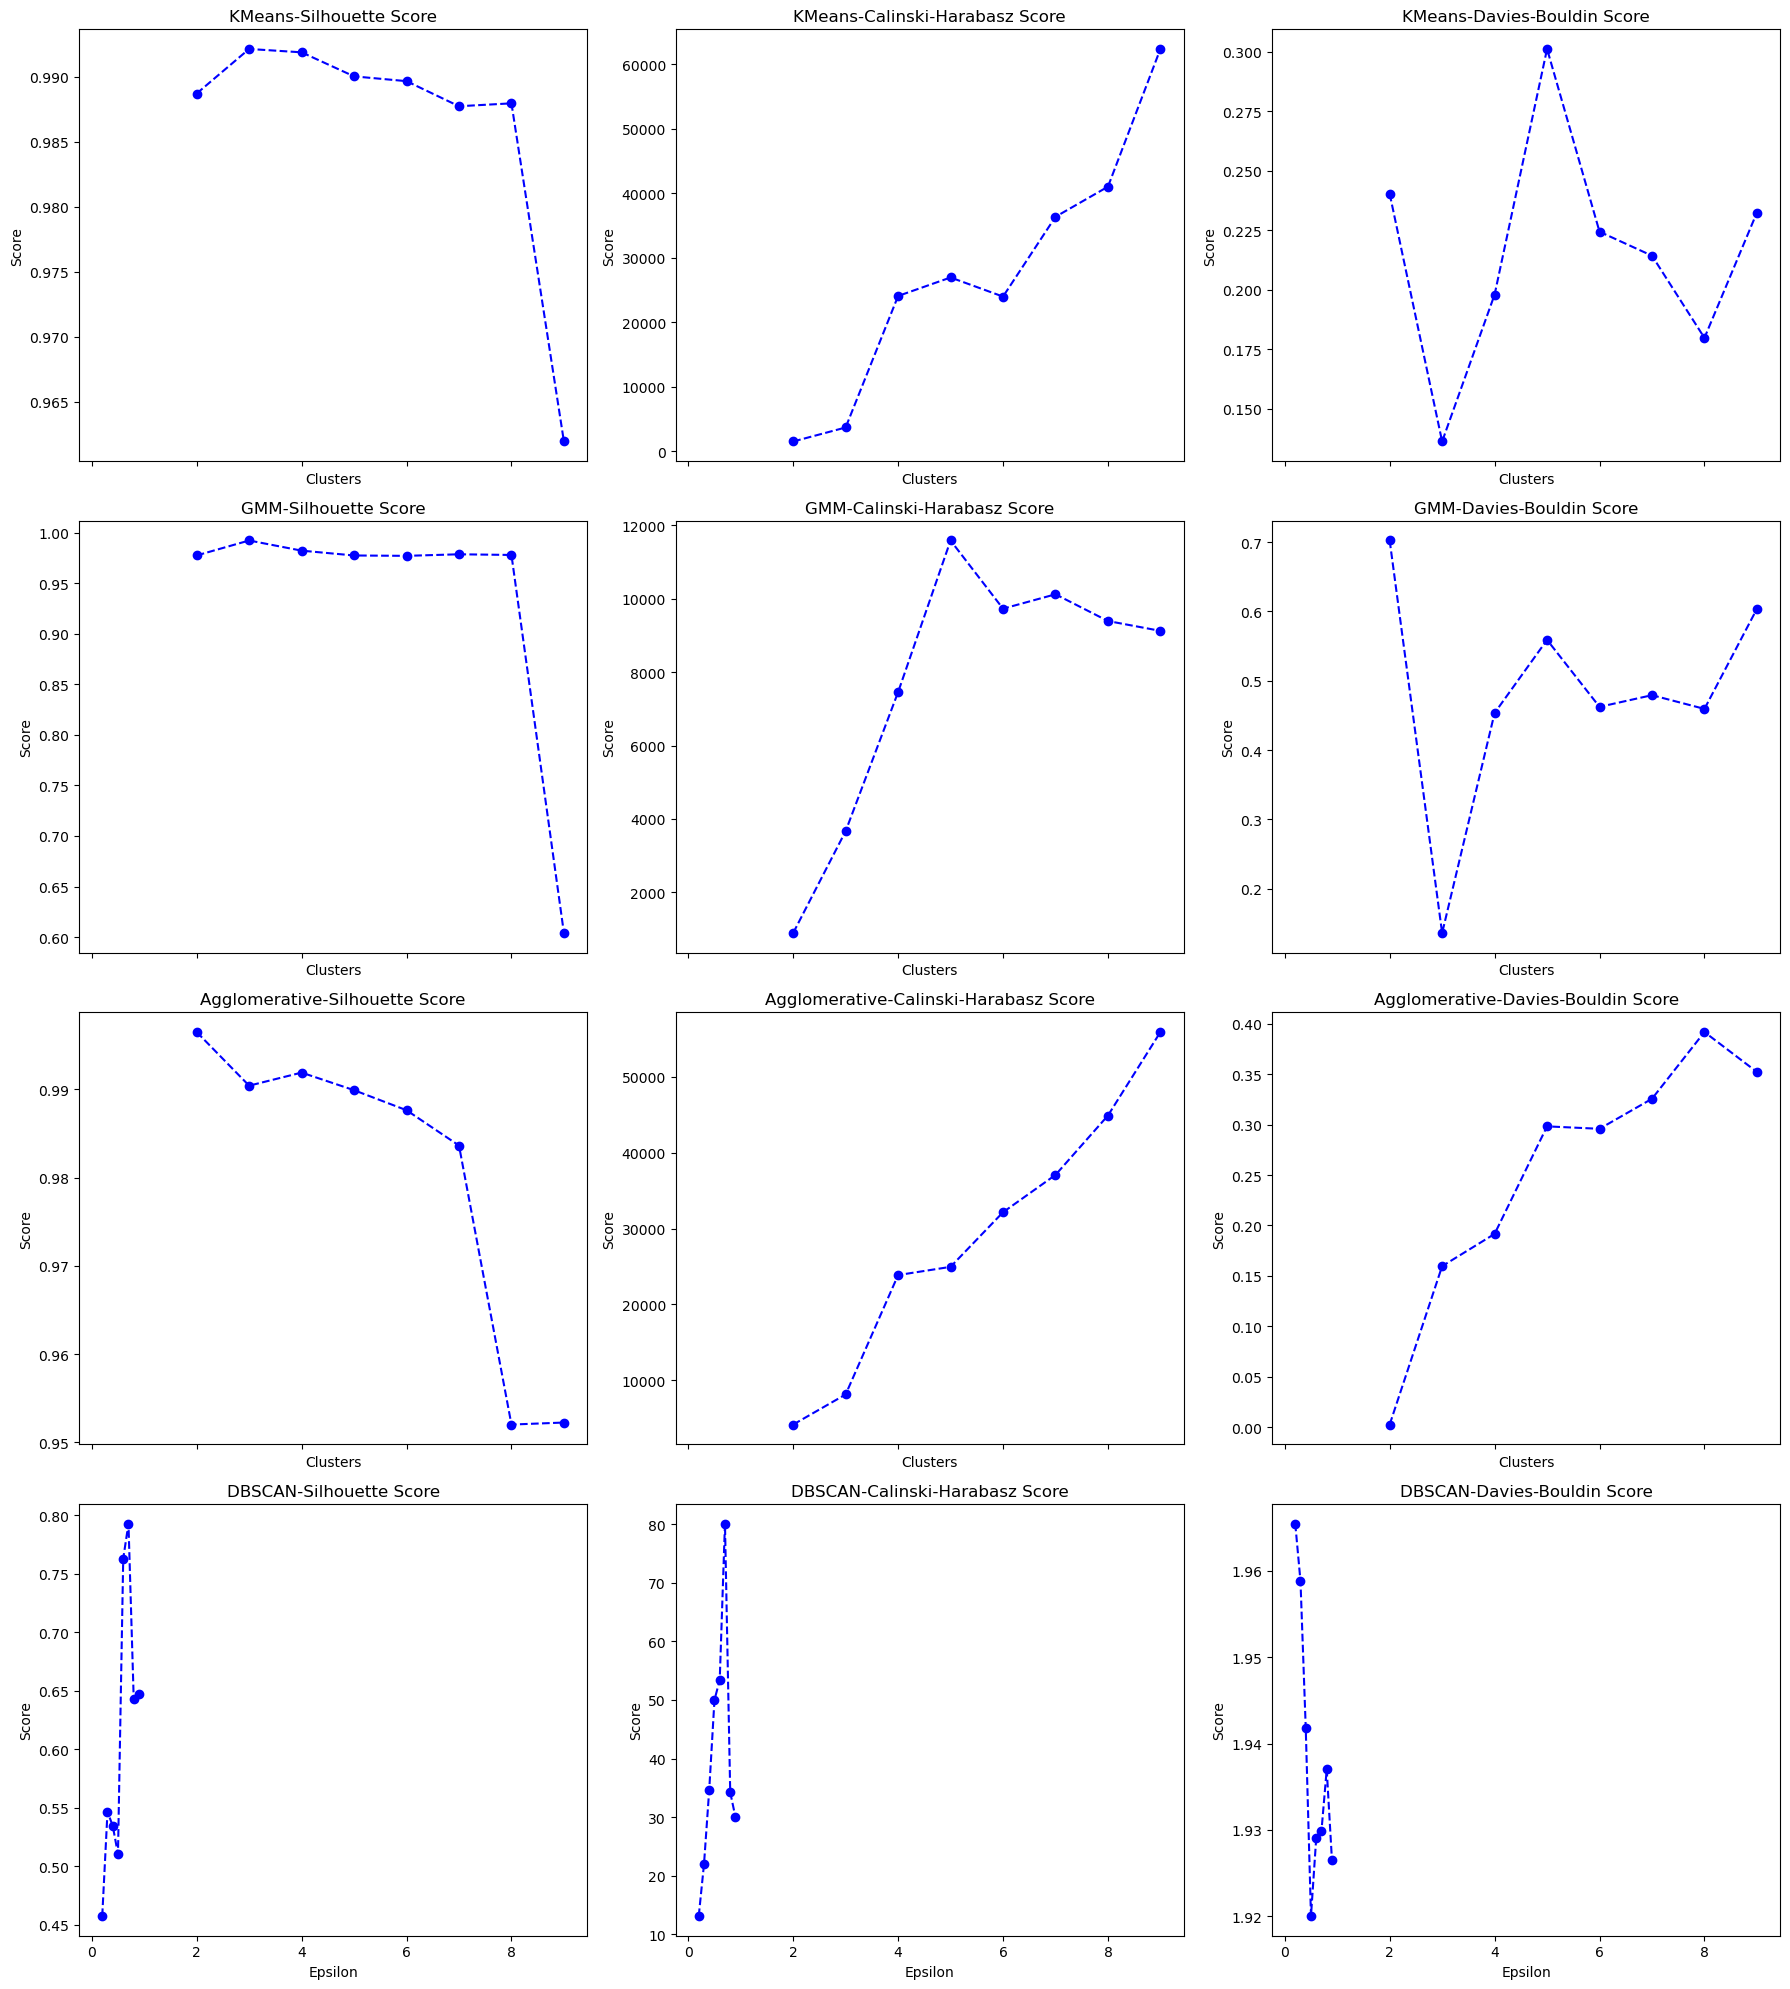

KMeans Metrics:
   Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
2          0.988711              1495.739776              0.240315
3          0.992138              3668.948110              0.136262
4          0.991880             24071.526904              0.197978
5          0.990031             26941.894976              0.301172
6          0.989663             23976.677108              0.224383
7          0.987734             36354.252282              0.214310
8          0.987958             41025.957959              0.179783
9          0.961958             62394.518810              0.232444

GMM Metrics:
   Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
2          0.977369               892.234837              0.702360
3          0.992138              3668.948110              0.136262
4          0.982099              7458.142415              0.453593
5          0.977323             11589.768293              0.559008
6          0.976955             

In [76]:
# Define the range of clusters and eps values to test
cluster_range = [2, 3, 4, 5, 6, 7, 8, 9]
eps_range = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize dictionaries to store metrics for each clustering method
kmeans_metrics_dict = {}
gmm_metrics_dict = {}
agg_metrics_dict = {}
dbscan_metrics_dict = {}

# Run clustering for each cluster count and store the metrics
for n_clusters in cluster_range:
    kmeans_metrics, _ = perform_kmeans_clustering(reduced_data, n_clusters, print_metrics=False, visual=False)
    kmeans_metrics_dict[n_clusters] = kmeans_metrics
    gmm_metrics, _ = perform_gmm_clustering(reduced_data, n_clusters, print_metrics=False, visual=False)
    gmm_metrics_dict[n_clusters] = gmm_metrics
    agg_metrics, _ = perform_agglomerative_clustering(reduced_data, n_clusters, print_metrics=False, visual=False)
    agg_metrics_dict[n_clusters] = agg_metrics

# Run DBSCAN clustering for each eps value and store the metrics
for eps in eps_range:
    dbscan_metrics, _ = perform_dbscan_clustering(reduced_data, eps, print_metrics=False, visual=False)
    dbscan_metrics_dict[eps] = dbscan_metrics

# Convert the metrics dictionaries to DataFrames for easier visualization
kmeans_metrics_df = pd.DataFrame(kmeans_metrics_dict).T
gmm_metrics_df = pd.DataFrame(gmm_metrics_dict).T
agg_metrics_df = pd.DataFrame(agg_metrics_dict).T
dbscan_metrics_df = pd.DataFrame(dbscan_metrics_dict).T

# Plot the metrics for each clustering method
fig, axes = plt.subplots(4, 3, figsize=(18, 20), sharex=True)

# Plot metrics
def plot_metrics(axes, cluster_range, metrics_df, algo_name, score_name):
    axes.plot(cluster_range, metrics_df[score_name], marker='o', linestyle='--', color='b')
    axes.set_title(f'{algo_name}-{score_name}')  
    axes.set_ylabel('Score')
    if algo_name == 'DBSCAN':
        axes.set_xlabel('Epsilon')
    else:
        axes.set_xlabel('Clusters')

plot_metrics(axes[0,0], cluster_range, kmeans_metrics_df, 'KMeans', 'Silhouette Score')
plot_metrics(axes[0,1], cluster_range, kmeans_metrics_df, 'KMeans', 'Calinski-Harabasz Score')
plot_metrics(axes[0,2], cluster_range, kmeans_metrics_df, 'KMeans', 'Davies-Bouldin Score')
plot_metrics(axes[1,0], cluster_range, gmm_metrics_df, 'GMM', 'Silhouette Score')
plot_metrics(axes[1,1], cluster_range, gmm_metrics_df, 'GMM', 'Calinski-Harabasz Score')
plot_metrics(axes[1,2], cluster_range, gmm_metrics_df, 'GMM', 'Davies-Bouldin Score')
plot_metrics(axes[2,0], cluster_range, agg_metrics_df, 'Agglomerative', 'Silhouette Score')
plot_metrics(axes[2,1], cluster_range, agg_metrics_df, 'Agglomerative', 'Calinski-Harabasz Score')
plot_metrics(axes[2,2], cluster_range, agg_metrics_df, 'Agglomerative', 'Davies-Bouldin Score')
plot_metrics(axes[3,0], eps_range, dbscan_metrics_df, 'DBSCAN', 'Silhouette Score')
plot_metrics(axes[3,1], eps_range, dbscan_metrics_df, 'DBSCAN', 'Calinski-Harabasz Score')
plot_metrics(axes[3,2], eps_range, dbscan_metrics_df, 'DBSCAN', 'Davies-Bouldin Score')
   
plt.tight_layout()
plt.show()

# print the metrics for each clustering method in a tabular format
print("KMeans Metrics:")
print(kmeans_metrics_df)
print("\nGMM Metrics:")
print(gmm_metrics_df)
print("\nAgglomerative Metrics:")
print(agg_metrics_df)
print("\nDBSCAN Metrics:")
print(dbscan_metrics_df)

1. **K-Means**:
    - Silhouette Score peaks at 4 clusters, indicating well-separated, compact clusters
    - Calinski-Harabasz Score inflects at 4 clusters, showing good cluster separation
    - Davies-Bouldin Score "elbow" at 4 clusters, suggesting diminishing returns beyond that

1. **Gaussian Mixture Model (GMM)**:

    - Similar trends to K-Means, with inflection points around 4 clusters across all evaluation metrics
    - Consistent with K-Means, pointing to 4 as the likely optimal cluster configuration

1. **Agglomerative**:

    - Scores also indicate 4 clusters as a meaningful grouping
    - Provides an alternative hierarchical perspective complementing the partitioning-based K-Means and GMM

1. **DBSCAN**:
    - Davies-Bouldin Score shows an "elbow" at ε=4, a good starting point for further analysis
    - Density-based approach can uncover clusters of varying sizes/shapes compared to other methods

### Insights
1. Optimal Number of Clusters:

    - KMeans, GMM, and Agglomerative Clustering consistently perform well with 3 to 5 clusters.
    - DBSCAN's performance depends on the density threshold (eps), with tight clusters forming at eps ~ 2.

1. Cluster Quality:

    - KMeans and Agglomerative Clustering show high-quality clusters with well-separated and compact groupings.
    - GMM provides nuanced insights via soft clustering, though slightly less compact clusters compared to KMeans.
    - DBSCAN excels at identifying noise and dense clusters but struggles with datasets lacking strong density patterns.

1. Model Selection:

    - KMeans: Best for datasets with well-separated, spherical clusters.
    - GMM: Suitable for datasets with overlapping clusters and when soft clustering is beneficial.
    - Agglomerative Clustering: Ideal for understanding hierarchical relationships in the data.
    - DBSCAN: Effective for identifying noise and handling non-spherical clusters but sensitive to parameter tuning.

### **Final Recommendation on Best Model Performance**
- **KMeans** is the most suitable, achieving high Silhouette Score (~0.99) and low Davies-Bouldin Score (~0.19) for 4 clusters. It effectively separates countries into distinct economic and conflict profiles: high-spending stable nations, moderate-spending conflict-prone countries, and low-spending stable regions.
- Agglomerative Clustering is an alternative if understanding hierarchical relationships (e.g., regional or economic blocks) is critical, with comparable scores to KMeans.

# Hyper Parameter Tuning

Hyperparameter tuning is the process of selecting the optimal values for hyperparameters in a machine learning model to improve its performance. Unlike model parameters (e.g., weights in regression), hyperparameters are set before training and control the learning process (e.g., number of clusters in KMeans, eps in DBSCAN). Tuning ensures the model generalizes well to unseen data while avoiding underfitting or overfitting (Bergstra & Bengio, 2012).

- Step 1: Define the hyperparameter space:
    - For KMeans: Test n_clusters from 2 to 10.
    - For DBSCAN: Experiment with eps values (e.g., 0.2 to 2) and min_samples.
- Step 2: Use evaluation metrics:
    - Optimize Silhouette Score for cluster separation and cohesion.
    - Validate with Calinski-Harabasz (compactness) and Davies-Bouldin (cluster separation).
- Step 3: Automate tuning:
    - Implement Grid Search or Random Search to find the best combination of hyperparameters.

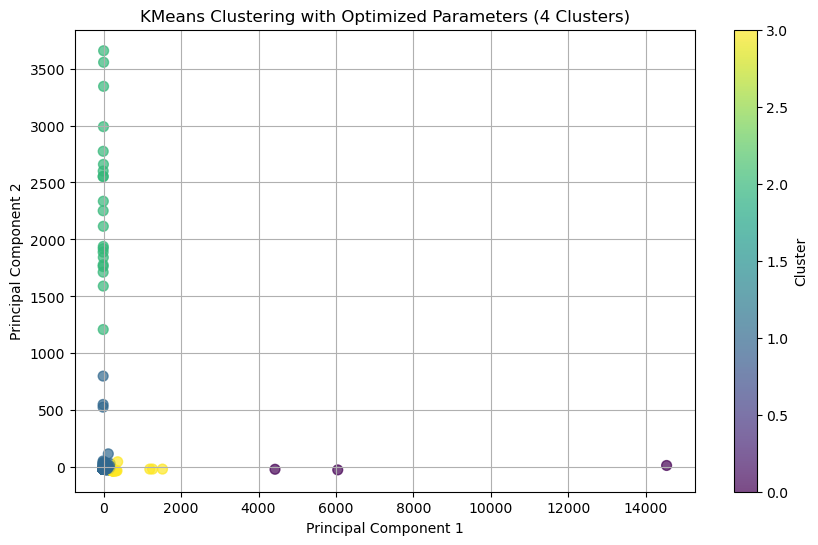

Best KMeans Hyperparameters and Silhouette Score:
                                     Best Parameters  Best Silhouette Score
0  {'init': 'random', 'n_init': 30, 'max_iter': 1...               0.971119

Full Hyperparameter Search Results:
         init  n_init  max_iter  silhouette_score
0   k-means++      10       100          0.991880
1   k-means++      10       500          0.991880
2   k-means++      10      1000          0.991880
3   k-means++      20       100          0.991880
4   k-means++      20       500          0.991880
5   k-means++      20      1000          0.991880
6   k-means++      30       100          0.991880
7   k-means++      30       500          0.991880
8   k-means++      30      1000          0.991880
9      random      10       100          0.971119
10     random      10       500          0.971119
11     random      10      1000          0.971119
12     random      20       100          0.971119
13     random      20       500          0.971119
14     rand

In [78]:
# Define the parameter grid for KMeans
param_grid = {
    'init': ['k-means++', 'random'],  # Initialization methods
    'n_init': [10, 20, 30],           # Number of centroid initializations
    'max_iter': [100, 500, 1000]       # Maximum number of iterations
}

# Custom grid search loop for KMeans
best_score = -1
best_params = {}
scores = []

for init in param_grid['init']:
    for n_init in param_grid['n_init']:
        for max_iter in param_grid['max_iter']:
            # Train KMeans with the current parameter combination
            kmeans = KMeans(n_clusters=optimal_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
            labels = kmeans.fit_predict(reduced_data)
            
            # Compute the silhouette score
            score = silhouette_score(reduced_data, labels)
            scores.append((init, n_init, max_iter, score))
            
            # Update the best parameters if the current score is better
            # if score > best_score:
            best_score = score
            best_params = {'init': init, 'n_init': n_init, 'max_iter': max_iter}

# Train the final KMeans model with the best parameters
kmeans_best = KMeans(n_clusters=optimal_clusters, **best_params, random_state=42)
final_labels = kmeans_best.fit_predict(reduced_data)

# Visualize the final clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f'KMeans Clustering with Optimized Parameters ({optimal_clusters} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the best parameters and silhouette score
results_df = pd.DataFrame(scores, columns=['init', 'n_init', 'max_iter', 'silhouette_score'])
best_results = pd.DataFrame([{'Best Parameters': best_params, 'Best Silhouette Score': best_score}])

# Print best parameters and score
print("Best KMeans Hyperparameters and Silhouette Score:")
print(best_results)

# Display all results
print("\nFull Hyperparameter Search Results:")
print(results_df)

- Best Initialization: "k-means++" consistently achieves the highest Silhouette Score (0.991880), indicating better starting centroids for clustering and superior cohesion and separation compared to "random" (0.971119).
- Impact of n_init: Increasing the number of initializations (10 to 30) does not improve results for "k-means++", confirming its robustness in finding optimal centroids.
- Impact of max_iter: Larger iteration limits (100 to 1000) do not affect clustering quality, as convergence is achieved early with "k-means++".
- Key Insight: "k-means++" is the most effective parameter for improving clustering performance, while increasing n_init or max_iter has minimal impact.

# Conclusion

1. **Optimal Clustering Method**:
    - KMeans emerged as the best clustering method for this dataset due to its high clustering quality:
        - Silhouette Score: ~0.99 (indicating strong cohesion and separation).
        - Davies-Bouldin Score: ~0.19 (indicating compact and distinct clusters).
    - Agglomerative Hierarchical Clustering provided similar results and offered additional insights into hierarchical relationships but lacked computational efficiency for large datasets.

1. **Cluster Insights**:
    - Cluster 1: High-Spending, Stable Nations:
        - Includes economically advanced countries with high GDP and military budgets (e.g., the US, China).
        - These nations have low conflict metrics, reflecting political and economic stability.
    - Cluster 2: Moderate-Spending, Conflict-Prone Nations:
        - Developing or emerging economies with moderate spending but high conflict involvement (e.g., regions in political instability).
    - Cluster 3: Low-Spending, Low-Conflict Nations:
        - Represents smaller or economically weaker nations with minimal conflict involvement and low defense budgets.
    - Cluster 4: Conflict-Heavy, Disproportionate Spending:
        - Outliers with high conflict metrics but relatively disproportionate military spending, often driven by regional instability (e.g., conflict-heavy regions in the Middle East or Africa).

1. **Impact of Dimensionality Reduction**:
    - PCA reduced the dataset to two components:
    - Principal Component 1 (Economic Metrics): Dominated by "GDP", "GovtSpending", and "PerCapita", reflecting economic power.
    - Principal Component 2 (Conflict Metrics): Influenced by "Deadliness", "TotalScore", and "Fragmentation", highlighting conflict levels.
    - The reduction preserved most of the dataset's variance, enabling efficient clustering without significant loss of information.

1. **Effectiveness of Hyperparameter Tuning**:
    - KMeans:
        - "k-means++" initialization was crucial for consistently high-quality clusters.
        - Silhouette and Davies-Bouldin Scores validated the choice of 4 clusters.

1. **Policy and Strategy Insights**:
    - Global Patterns:

        - Cluster 1 (Wealthy, Stable Nations): Focus on maintaining influence and stability.
        - Cluster 2 (Conflict-Prone Nations): Require targeted interventions and international aid to address instability.
        - Cluster 3 (Low-Spending Nations): Support in economic development and defense partnerships.
        - Cluster 4 (Conflict-Heavy Nations): Prioritize conflict resolution and peacekeeping efforts.
    - Outliers:

        - Outliers in Cluster 4 highlight countries where disproportionate military spending or conflict metrics skew standard patterns, warranting tailored policy responses.
    - Validation:

        - The high Silhouette Scores and cluster compactness suggest the dataset is well-suited for clustering, with 4 clusters offering a clear, interpretable segmentation.

# References

Tukey, J. W. (1977). Exploratory Data Analysis. Pearson.

Bholowalia, P., & Kumar, A. (2014). EBK-Means: A clustering technique based on elbow method and k-means in WSN. International Journal of Computer Applications, 105(9), 17-24. https://doi.org/10.5120/18405-9674

MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability, Volume 1: Statistics, 281–297.

Reynolds, D. A. (2009). Gaussian Mixture Models. Encyclopedia of Biometrics, 659–663. https://doi.org/10.1007/978-0-387-73003-5_196

Lloyd, S. (1982). Least squares quantization in PCM. IEEE Transactions on Information Theory, 28(2), 129-137. https://doi.org/10.1109/TIT.1982.1056489

Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. In Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining (pp. 226-231).

Ward, J. H. (1963). Hierarchical grouping to optimize an objective function. Journal of the American Statistical Association, 58(301), 236-244. https://doi.org/10.1080/01621459.1963.10500845

Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(1), 281-305.